## EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/gemstone.csv')

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
# No null values in the dataset
# 3 categorical features and 8 numeric
# the column 'id' is redundant

In [4]:
df = df.drop(columns='id')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [11]:
# check for duplicates
df.duplicated().sum()

0

In [5]:
numerical_features = df.columns[df.dtypes!='object']
categorical_features = df.columns[df.dtypes=='object']

print(f'Numerical features: {numerical_features.values}')
print(f'Categorical features: {categorical_features.values}')

Numerical features: ['carat' 'depth' 'table' 'x' 'y' 'z' 'price']
Categorical features: ['cut' 'color' 'clarity']


In [28]:
df[numerical_features].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


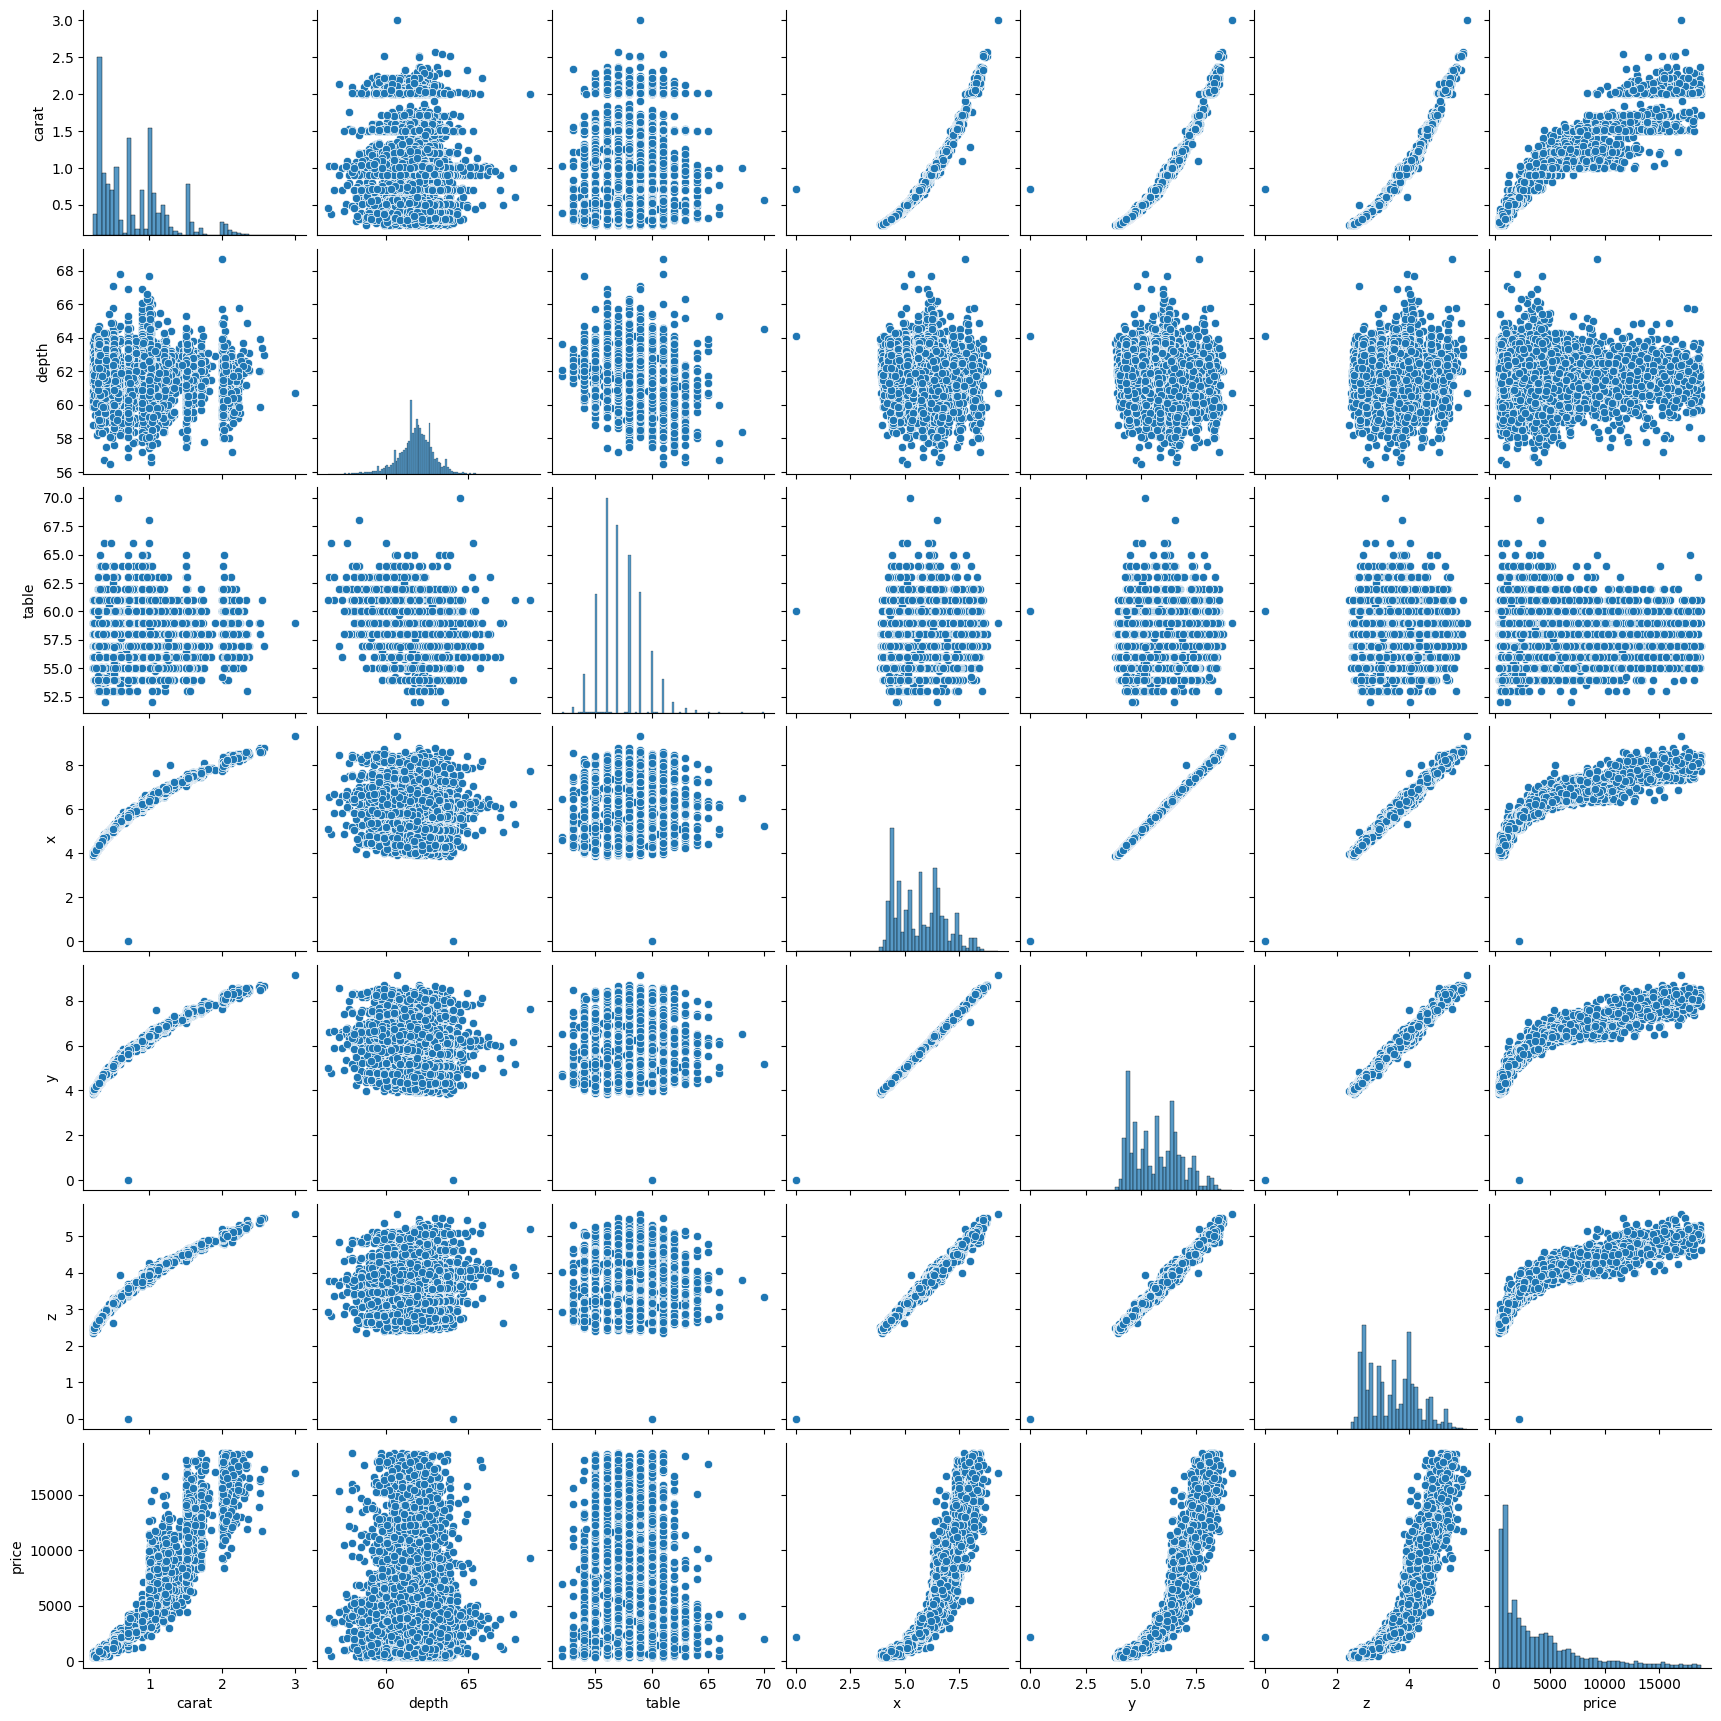

In [36]:
sample = df.sample(10000, random_state=0)
sns.pairplot(sample)

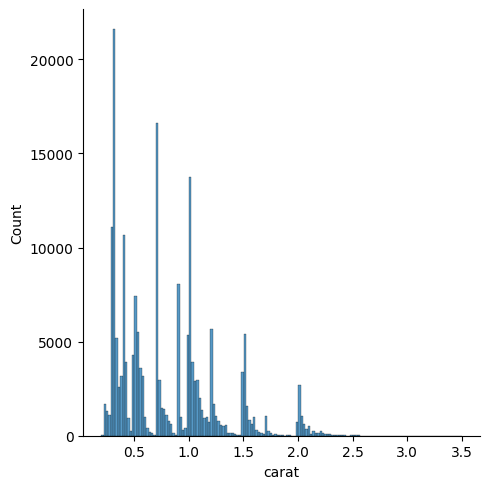

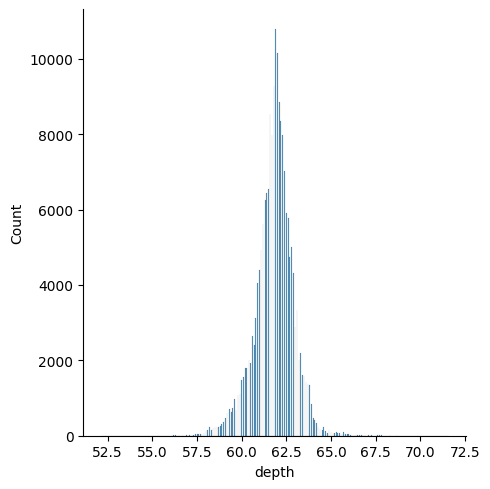

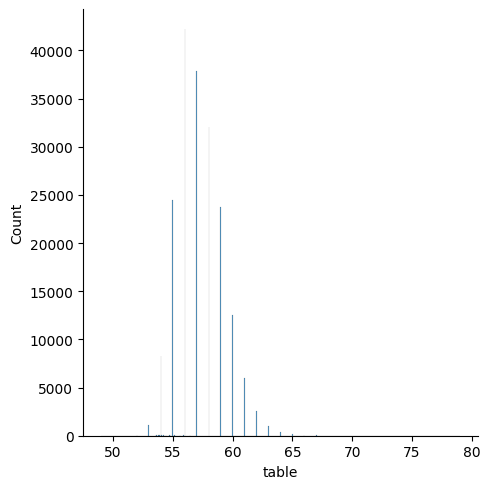

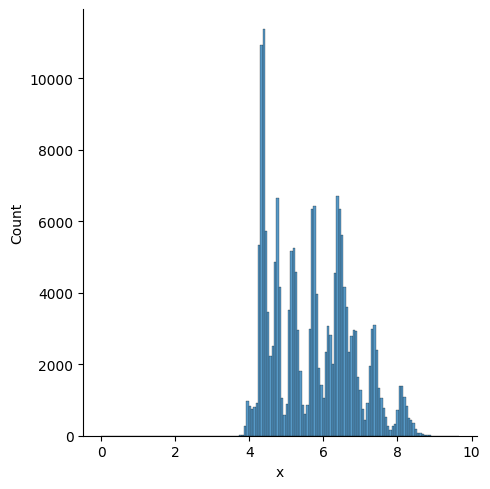

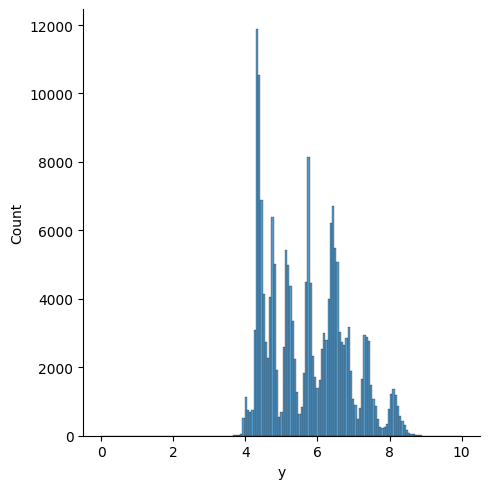

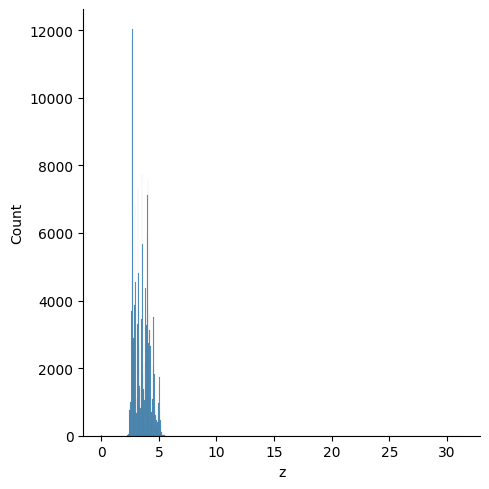

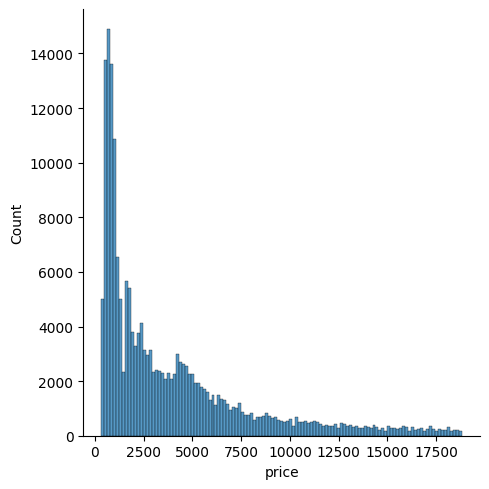

In [23]:
for i in numerical_features:
    sns.displot(df[i])
    plt.show()

<Axes: >

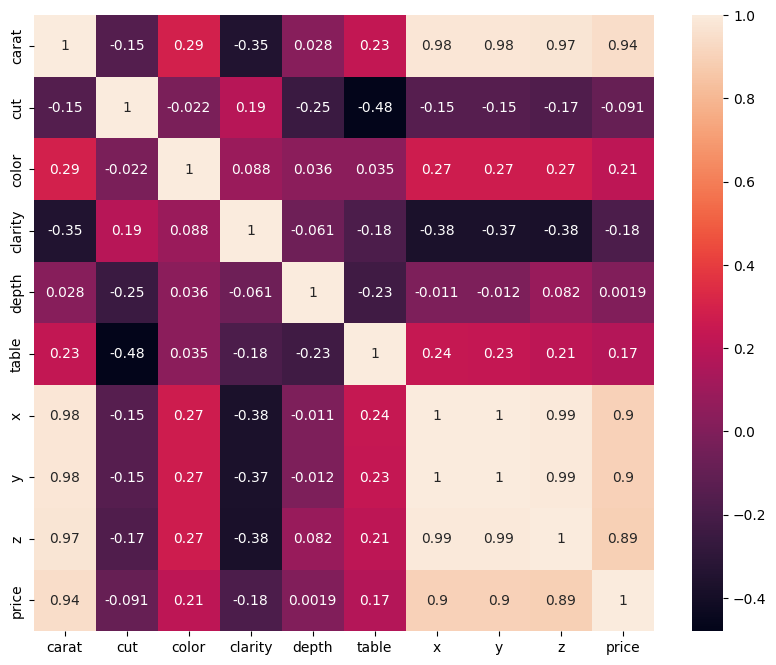

In [29]:
# correlation between features

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [31]:
# carat is highly correlated with x,y and z
# x,y,z is also highly correlated with each other

In [29]:
df[categorical_features].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [33]:
for i in categorical_features:
    print(f'{i} unique: {df[i].unique()}')
    print('='*50,'\n')

cut unique: ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']

color unique: ['F' 'J' 'G' 'E' 'D' 'H' 'I']

clarity unique: ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']



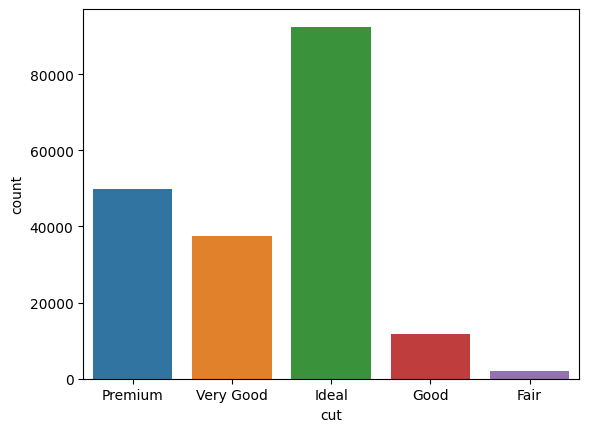

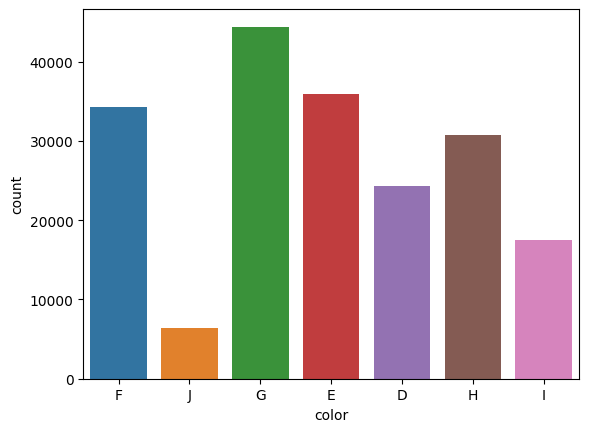

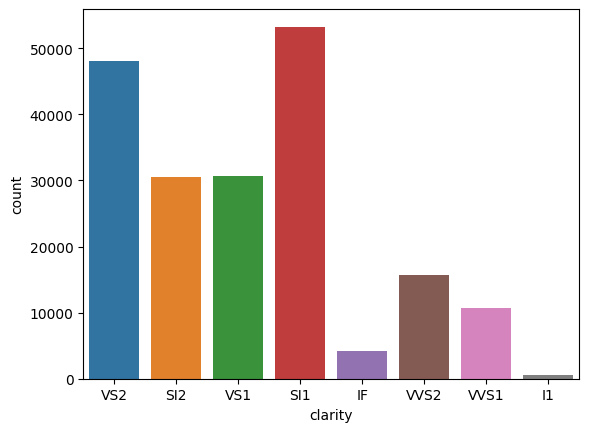

In [15]:
for i in categorical_features:
    sns.countplot(data=df, x=i)
    plt.show()

In [6]:
# ordinal encoding of categorical variables

cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [7]:
df['cut'] = df['cut'].map(cut_map, )
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map, )

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


## Model Training

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('../data/gemstone.csv')
df = df.drop(columns='id')

In [5]:
# dependent and independent features

X = df.drop(columns='price')
Y = df['price']

In [6]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [7]:
# custom ranking for each categories

cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [8]:
# Numerical Pipeline
numerical_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

# Categorical Pipeline
categorical_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinalEncoder', OrdinalEncoder(categories = [cut_categories, color_categories, clarity_categories])),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ('num_pipeline', numerical_pipeline, numerical_cols),
    ('categorical_pipeline', categorical_pipeline, categorical_cols)
])

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [10]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [11]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [12]:
for i,j in zip(regression.feature_names_in_, regression.coef_):
    print(f'{i} : {j}')
print(f'intercept : {regression.intercept_}')

num_pipeline__carat : 6441.804649303836
num_pipeline__depth : -129.83071172724115
num_pipeline__table : -66.9356399492111
num_pipeline__x : -1981.579158697213
num_pipeline__y : -236.5774821575791
num_pipeline__z : -67.2074878637244
categorical_pipeline__cut : 71.73283446397609
categorical_pipeline__color : -465.8616361595813
categorical_pipeline__clarity : 650.7643553755436
intercept : 3967.1136744378264


In [13]:
import numpy as np

def model_evaluation(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, predicted)
    r2_squared = r2_score(true, predicted)
    return rmse, mae, r2_squared

In [28]:
# Training multiple models

models = {
    'LinearRegression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'ElasticNet' : ElasticNet()
}

for i in models:
    model = models[i]
    model.fit(X_train, y_train)

    # predictions
    y_pred = model.predict(X_test)

    rmse, mae, r2_squared = model_evaluation(y_test, y_pred)

    print(f'Model Name: {i}')
    print('Model Training Performance')
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 score: {r2_squared*100}")
    print('='*40,'\n')

Model Name: LinearRegression
Model Training Performance
RMSE: 1009.002712279258
MAE: 673.9959687568212
R2 score: 93.73226209567187

Model Name: Lasso
Model Training Performance
RMSE: 1009.2430425126397
MAE: 675.1657756693677
R2 score: 93.72927596632273

Model Name: Ridge
Model Training Performance
RMSE: 1008.9929036507631
MAE: 674.0221835215744
R2 score: 93.73238395384537

Model Name: ElasticNet
Model Training Performance
RMSE: 1532.4893580652672
MAE: 1065.353454355148
R2 score: 85.54157139306304

